In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
train_data = pd.read_csv('train_BRCpofr.csv')

In [62]:
test_df = pd.read_csv('test_koRSKBP.csv')

In [63]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [64]:
train_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [65]:
train_data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [66]:
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [67]:
train_data.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [68]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [69]:
train_data.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [71]:
train_data.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [72]:
train_data.shape

(89392, 12)

In [73]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [74]:
train_data_ = train_data.select_dtypes(exclude=['int', 'float'])
for col in train_data_.columns:
    print(train_data_[col].unique()) # to print categories name only
#     print(train_data_[col].value_counts()) # to print count of every category

['Male' 'Female']
['Urban' 'Rural']
['Bachelor' 'High School' 'Others']
['5L-10L' 'More than 10L' '2L-5L' '<=2L']
['More than 1' '1']
['A' 'C' 'B']
['Platinum' 'Gold' 'Silver']


In [75]:
# replacing values
train_data['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
train_data['area'].replace(['Urban', 'Rural'],[0, 1], inplace=True)
train_data['qualification'].replace(['Bachelor', 'High School','Others'],[0, 1,2], inplace=True)
train_data['income'].replace(['5L-10L', 'More than 10L','2L-5L','<=2L','2L-'],[0,1,2,3,4], inplace=True)
train_data['num_policies'].replace(['More than 1', '1'],[0, 1], inplace=True)
train_data['policy'].replace(['A', 'B','C'],[0, 1, 2], inplace=True)
train_data['type_of_policy'].replace(['Platinum', 'Gold','Silver'],[0, 1, 2], inplace=True)

In [76]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,0,0,0,0,1,5,5790,0,0,0,64308
1,2,0,1,1,0,0,8,5080,0,0,0,515400
2,3,0,0,0,0,1,8,2599,0,0,0,64212
3,4,1,1,1,0,0,7,0,0,0,0,97920
4,5,0,0,1,1,1,6,3508,0,0,1,59736


In [77]:
# train_data = train_data.select_dtypes(exclude=['int', 'float'])
# for col in train_data_.columns:
#     print(train_data_[col].unique()) # to print categories name only
# #     print(train_data_[col].value_counts()) # to print count of every category

In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              89392 non-null  int64
 1   gender          89392 non-null  int64
 2   area            89392 non-null  int64
 3   qualification   89392 non-null  int64
 4   income          89392 non-null  int64
 5   marital_status  89392 non-null  int64
 6   vintage         89392 non-null  int64
 7   claim_amount    89392 non-null  int64
 8   num_policies    89392 non-null  int64
 9   policy          89392 non-null  int64
 10  type_of_policy  89392 non-null  int64
 11  cltv            89392 non-null  int64
dtypes: int64(12)
memory usage: 8.2 MB


In [79]:
# Changing the existing data types into the required data types for the some features for better EDA
objects = [features for features in train_data.columns if train_data[features].dtypes=='O']
for i in objects:
    if i != 'cltv':
        train_data[i] = train_data[i].astype(float)

In [80]:
train_data.dtypes

id                int64
gender            int64
area              int64
qualification     int64
income            int64
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int64
policy            int64
type_of_policy    int64
cltv              int64
dtype: object

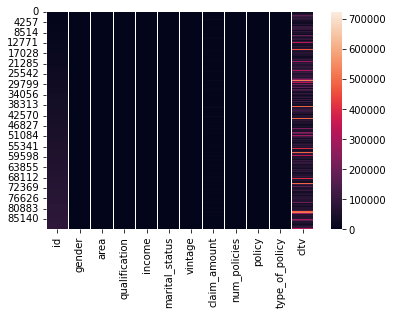

In [81]:
sns.heatmap(train_data)

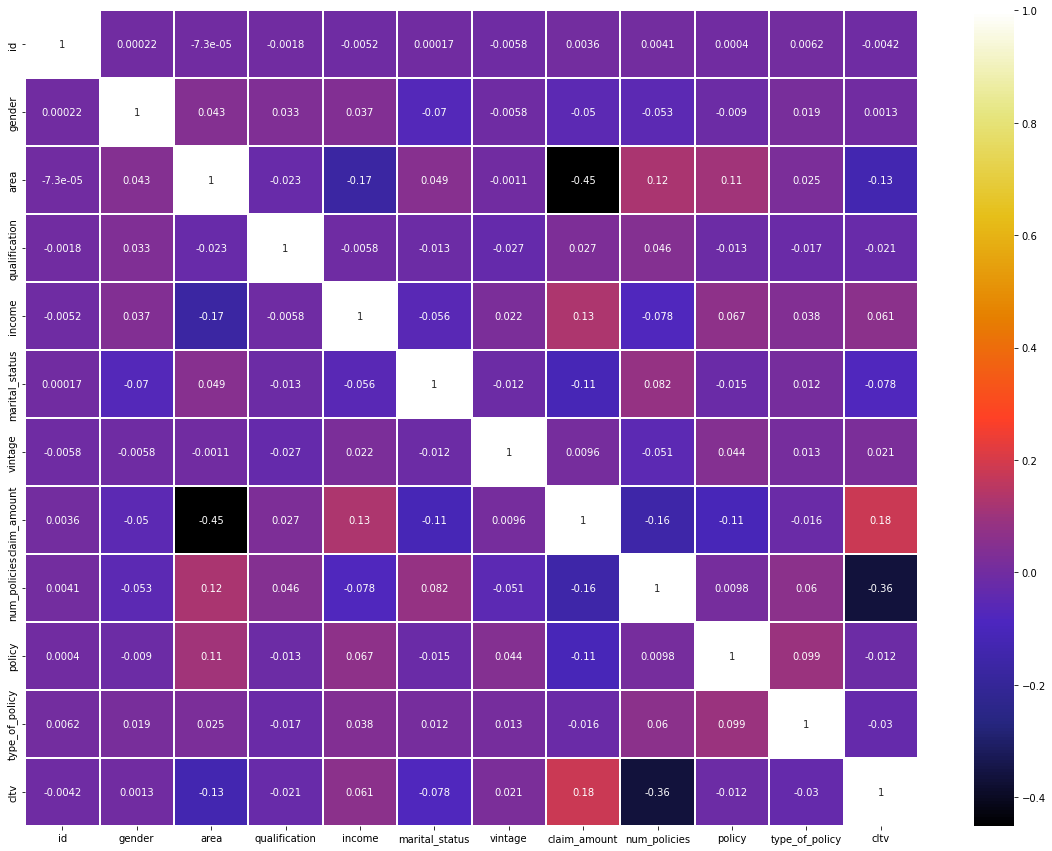

In [82]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "CMRmap",xticklabels="auto", yticklabels="auto")

In [83]:
corr = train_data.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:                       id    gender      area  qualification    income  \
id              1.000000  0.000215 -0.000073      -0.001803 -0.005173   
gender          0.000215  1.000000  0.042516       0.033076  0.036720   
area           -0.000073  0.042516  1.000000      -0.022908 -0.173256   
qualification  -0.001803  0.033076 -0.022908       1.000000 -0.005753   
income         -0.005173  0.036720 -0.173256      -0.005753  1.000000   
marital_status  0.000171 -0.070468  0.048739      -0.012618 -0.055991   
vintage        -0.005824 -0.005827 -0.001145      -0.027283  0.021754   
claim_amount    0.003634 -0.049773 -0.451054       0.027440  0.131812   
num_policies    0.004105 -0.052871  0.121898       0.045894 -0.077643   
policy          0.000395 -0.009049  0.107123      -0.012722  0.067357   
type_of_policy  0.006179  0.018847  0.025001      -0.016678  0.038156   
cltv           -0.004223  0.001318 -0.133107      -0.021330  0.061099   

                marita

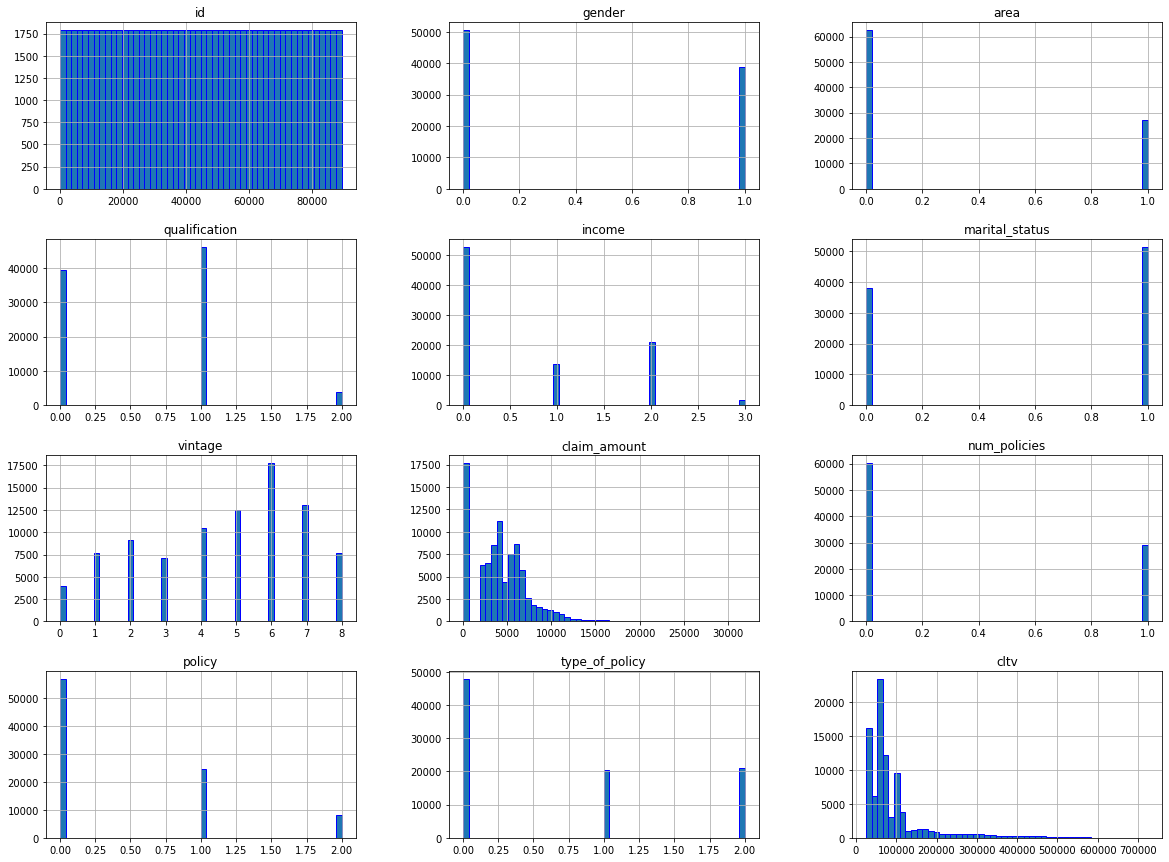

In [84]:
train_data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [85]:
X = train_data.drop(['id','gender', 'area', 'qualification', 'marital_status'],axis=1)
Y = train_data['cltv']

In [86]:
X.columns

Index(['income', 'vintage', 'claim_amount', 'num_policies', 'policy',
       'type_of_policy', 'cltv'],
      dtype='object')

In [87]:
Y

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [88]:
X

,income,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,0,5,5790,0,0,0,64308
1,0,8,5080,0,0,0,515400
2,0,8,2599,0,0,0,64212
3,0,7,0,0,0,0,97920
4,1,6,3508,0,0,1,59736
...,...,...,...,...,...,...,...
89387,1,6,0,0,1,0,95736
89388,0,0,3897,0,0,0,67596
89389,0,4,3363,0,1,0,114120
89390,2,8,0,0,1,0,71772


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=20)

In [90]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [92]:
# Instantiation
xgb_r = xg.XGBRegressor()
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
y_pred_xg = xgb_r.predict(X_test)

# #r2 score test
print(f"Test Score : {round(r2_score(y_test, y_pred_xg),2)}")

# #r2 score test
print(f"Train Score : {round(r2_score(y_train, xgb_r.predict(X_train)),2)}")

MSE_XG = round(mean_squared_error(y_test, y_pred_xg),2)
MAE_XG = round(mean_absolute_error(y_test, y_pred_xg),2)
RMSE_XG =  round(np.sqrt(mean_squared_error(y_test, y_pred_xg)),2)
print(f"MSE : {MSE_XG}\nMAE : {MAE_XG}\nRMSE : {RMSE_XG}")

XG_r2_score = round(r2_score(y_test, y_pred_xg),3)
XG_adj_r2_score = round(1-((1-XG_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),3)
print(f"Test>R-Squared Accuracy : {XG_r2_score}  \nTest>Adjusted R-Squared Accuracy : {XG_adj_r2_score}")

XG_train_r2_score = round(r2_score(y_train, xgb_r.predict(X_train)),3)
XG_train_adj_r2_score = round(1-((1-XG_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),3)
print(f"Train> R-Squared Accuracy : {XG_train_r2_score}  \nTrain>Adjusted R-Squared Accuracy : {XG_train_adj_r2_score}")

[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test Score : 1.0
Train Score : 1.0
MSE : 522728.72
MAE : 423.64
RMSE : 723.0
Test>R-Squared Accuracy : 1.0  
Test>Adjusted R-Squared Accuracy : 1.0
Train> R-Squared Accuracy : 1.0  
Train>Adjusted R-Squared Accuracy : 1.0


In [93]:
''' Detection '''
# IQR
Q1 = np.percentile(train_data['income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train_data['income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train_data.shape)
 
# Upper bound
upper = np.where(train_data['vintage'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train_data['vintage'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train_data.drop(upper[0], inplace = True)
train_data.drop(lower[0], inplace = True)
 
print("New Shape: ", train_data.shape)

Old Shape:  (89392, 12)
New Shape:  (38423, 12)


In [94]:
train_data.describe()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000,38423.000000
mean,44807.320043,0.435937,0.298701,0.615152,0.667699,0.583140,2.319965,4353.537985,0.337090,0.430211,0.689040,97395.991359
std,25770.711266,0.495885,0.457695,0.568009,0.891915,0.493046,1.338443,3240.365728,0.472722,0.665615,0.819456,90738.946982
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24828.000000
25%,22461.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2418.000000,0.000000,0.000000,0.000000,50976.000000
50%,44936.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,4097.000000,0.000000,0.000000,0.000000,66084.000000
75%,67123.500000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6105.000000,1.000000,1.000000,1.000000,103392.000000
max,89390.000000,1.000000,1.000000,2.000000,3.000000,1.000000,4.000000,30659.000000,1.000000,2.000000,2.000000,689808.000000


In [95]:
''' Detection '''
# IQR
Q1 = np.percentile(train_data['type_of_policy'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train_data['type_of_policy'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train_data.shape)
 
# Upper bound
upper = np.where(train_data['type_of_policy'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train_data['type_of_policy'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train_data.drop(upper[0], inplace = True)
train_data.drop(lower[0], inplace = True)
 
print("New Shape: ", train_data.shape)

Old Shape:  (38423, 12)
New Shape:  (38423, 12)


In [96]:
X = train_data.drop(['id','gender', 'area', 'qualification', 'marital_status'],axis=1)
Y = train_data['cltv']

In [97]:
X

,income,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
5,1,1,0,1,2,1,348768
7,0,0,5473,0,0,2,64128
8,0,3,6105,0,0,1,94536
10,0,4,4329,0,0,0,74148
13,2,1,4615,0,2,2,133344
...,...,...,...,...,...,...,...
89381,0,1,6356,1,0,2,63300
89385,0,4,3138,0,0,1,96672
89386,0,0,5744,1,0,0,59688
89388,0,0,3897,0,0,0,67596


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=20)

In [99]:
# Instantiation
xgb_r = xg.XGBRegressor()
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
y_pred_xg = xgb_r.predict(X_test)

# #r2 score test
print(f"Test Score : {round(r2_score(y_test, y_pred_xg),2)}")

# #r2 score test
print(f"Train Score : {round(r2_score(y_train, xgb_r.predict(X_train)),2)}")

MSE_XG = round(mean_squared_error(y_test, y_pred_xg),2)
MAE_XG = round(mean_absolute_error(y_test, y_pred_xg),2)
RMSE_XG =  round(np.sqrt(mean_squared_error(y_test, y_pred_xg)),2)
print(f"MSE : {MSE_XG}\nMAE : {MAE_XG}\nRMSE : {RMSE_XG}")

XG_r2_score = round(r2_score(y_test, y_pred_xg),3)
XG_adj_r2_score = round(1-((1-XG_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),3)
print(f"Test>R-Squared Accuracy : {XG_r2_score}  \nTest>Adjusted R-Squared Accuracy : {XG_adj_r2_score}")

XG_train_r2_score = round(r2_score(y_train, xgb_r.predict(X_train)),3)
XG_train_adj_r2_score = round(1-((1-XG_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),3)
print(f"Train> R-Squared Accuracy : {XG_train_r2_score}  \nTrain>Adjusted R-Squared Accuracy : {XG_train_adj_r2_score}")

[14:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test Score : 1.0
Train Score : 1.0
MSE : 489129.5
MAE : 414.8
RMSE : 699.38
Test>R-Squared Accuracy : 1.0  
Test>Adjusted R-Squared Accuracy : 1.0
Train> R-Squared Accuracy : 1.0  
Train>Adjusted R-Squared Accuracy : 1.0


In [100]:
import pandas as pd
#taking the mean of cltv from the training set
test_df['cltv']=train_data['cltv'].mean()

#creating the sample submission file
sample_submission = test_df[['id','cltv']]
sample_submission.to_csv("my_submission.csv",index=False)